#### Objective: Here we have two objectives
 1. Indentify the emplpoyees who might leave the company in near feature.
 2. Find the factors leading employees to leave the company.

In [33]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Loading the Data:
df = pd.read_csv("D:\Hemanth\Scaler\Scaler_Business_CaseStudies\Class_projects\Decision_tree\IBM_HR_ATTRITION_RATE\HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### 1. Indentification of variables and Datatypes:


In [35]:
df.shape

(1470, 35)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [37]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### Observations:
1. Our Data has 1470 records and 35 fields/attributes.
2. Data has both categorical and numerical data.


#### 2. Analysing the Basic metrics:

In [38]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [39]:
# Check for null vales:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### Observations:
1. Our data doesn't have any null values.
2. Seems like we have columns like 'EmployeeCount' where entire col values are uniformly distributed. 
    We can remove these sort of features are dont contribute much while model building.

##### 3. Graphical and Non Graphical Analysis:

In [40]:
df_cols = df.columns

In [ ]:
# Lets check for unqiue values and distribution of each variable:
for col in df_cols:
    print(f"The count values for {col} is \n {df[col].value_counts()}")
    df[col].hist()
    plt.title(f"The Distribution of {col}\n")
    if df[col].dtype == 'object':
        plt.xticks(rotation=90)
    plt.show()

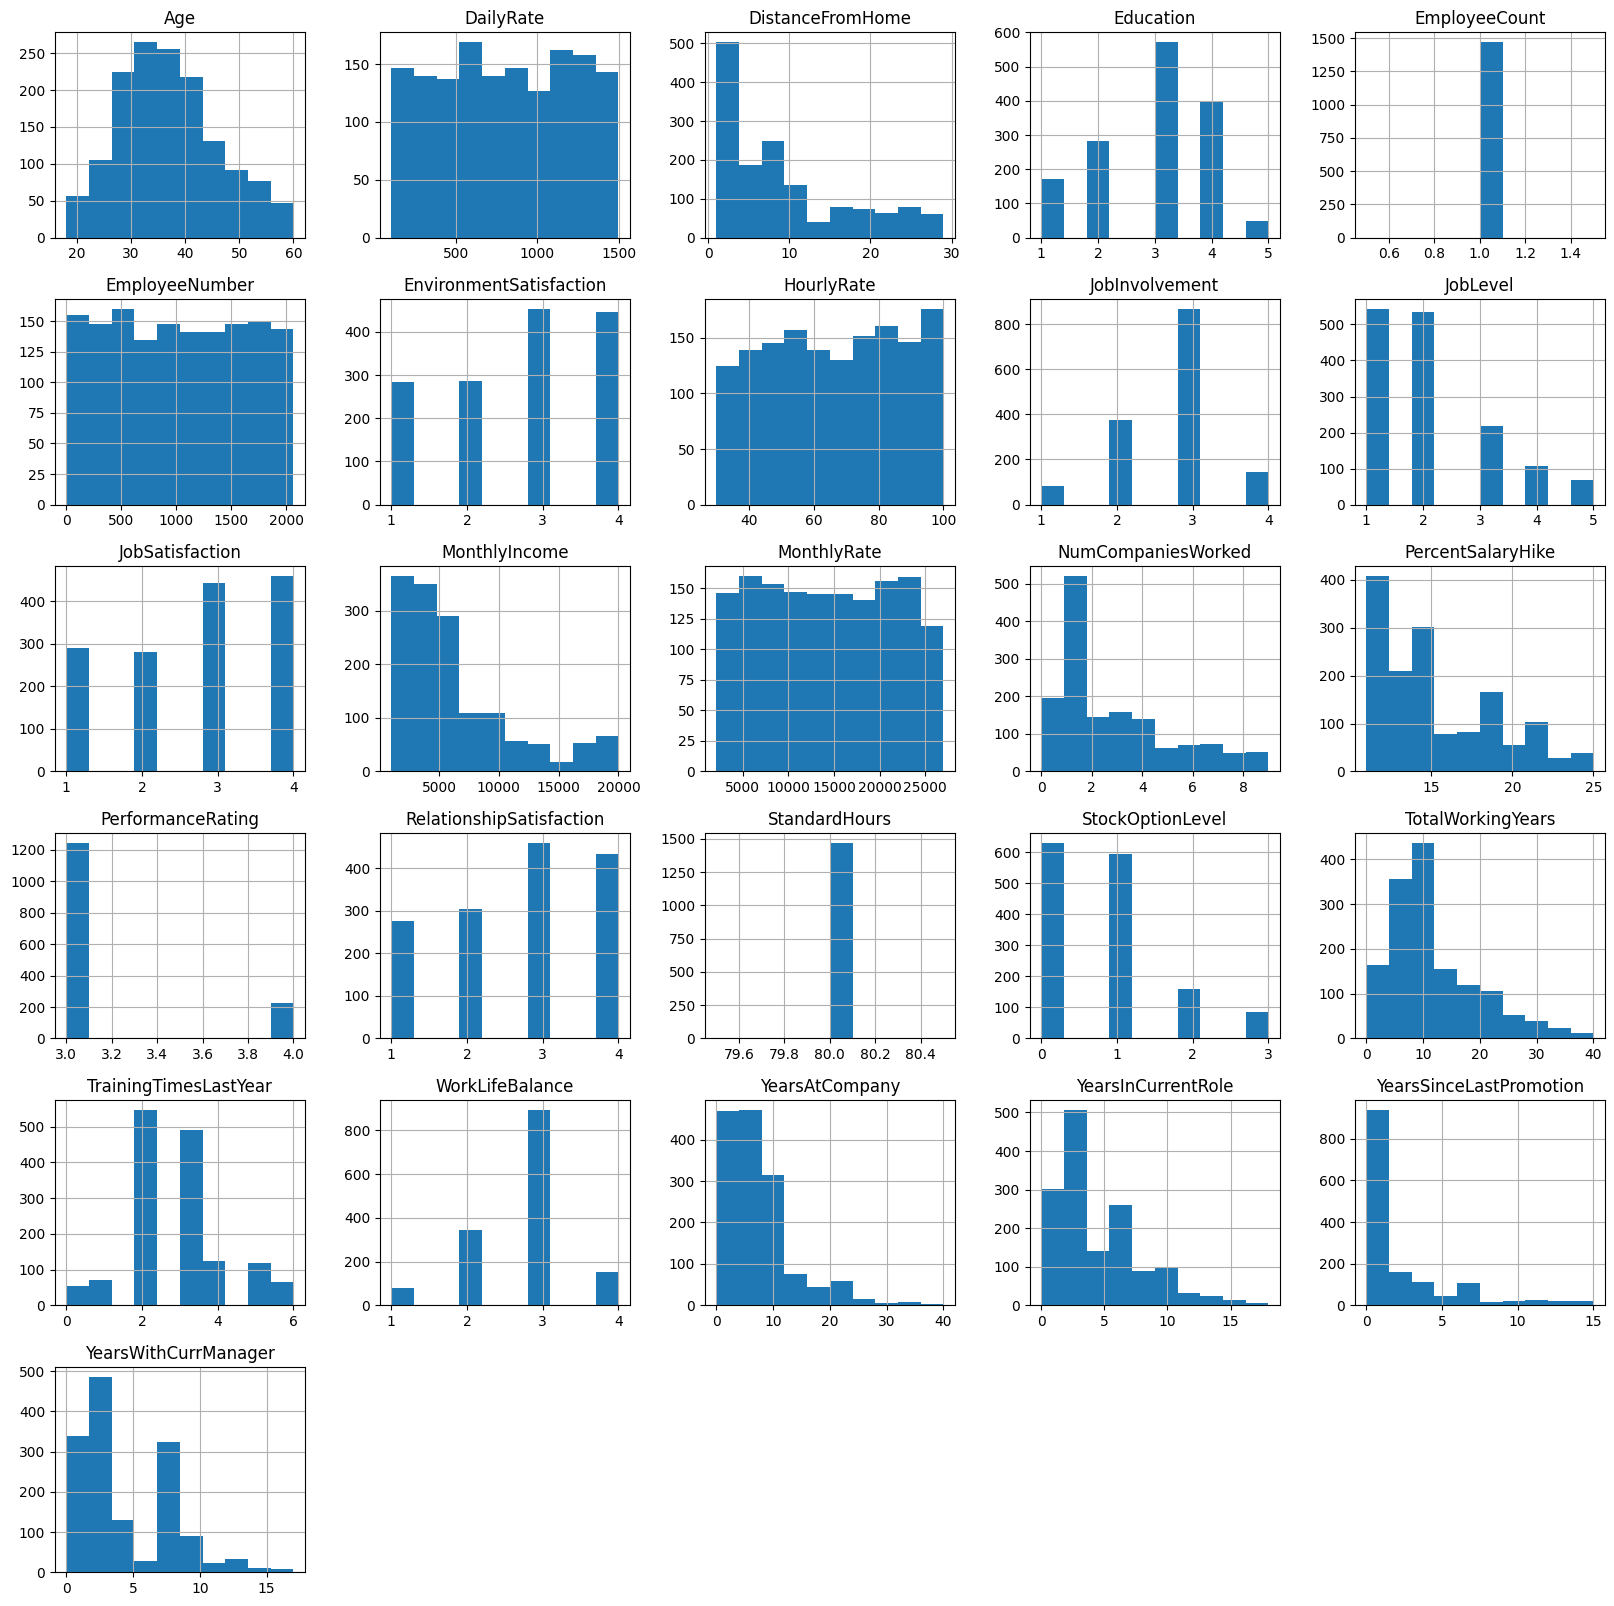

In [42]:
df.hist(figsize=(20,20))
plt.show()

##### Observations:
1.  Data is imbalanced.
2.  Many of the featues are right skewed. Feature Scaling is required.
3.  Few features are constant throughout and not much useful for predictions. We can drop off these features.
    (EmployeeCount, StandardHours)
4.  Few Features are uniformly distributes and constant across the range. We can drop off these featured also.
    (EmployeeNumber)
5.  Few Features seems to Normally distributed but slightly right skewed.(Age)
6.  Some features are binomially or multinomially distrubuted. we need to encode them before model building.


In [43]:
# Remove those features that wont contribute our analysis:
df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1,inplace=True)

##### Encoding the categorical variables:
1. Do Binary Encoding when variables have 2 categories.
2. Do labelEncoder when categories are more than 2 and less than 6 and also order is to be maintained.
3. Do One Hot Encoding when categories are more than 2 and less than6 when order is not to be maintained.
4. Do TargetEncoding when variables have many categories.

In [44]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#Binary Encoder
def labelEncoder(col):
    if col.dtype == 'object' and col.nunique()==2:
        labelencoder.fit(col)
        col = labelencoder.transform(col)
    return col 

df = df.apply(lambda col:labelEncoder(col))

In [46]:
#OneHotEncoding:

#Get cols where OHE to be applied:
ohe_cols = []
for col in df.columns:
    if df[col].dtype=='object' and  df[col].nunique() <=6 and df[col].nunique()>2:
        ohe_cols.append(col)

df = pd.get_dummies(df,columns=ohe_cols,drop_first=True)

In [48]:
#Applying target encoding:
targetEncodeCols = []
for col in df.columns:
    if df[col].dtype=='object' and df[col].nunique() >6:
        targetEncodeCols.append(col)

targetEncodeCols

['JobRole']

In [49]:
#As target encoding can applied only on train data, we need to split the data:
x = df.drop(['Attrition'],axis=1)
y = df['Attrition'].copy()

In [51]:
#Split the data:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=23,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1176, 37), (294, 37), (1176,), (294,))

In [56]:
#Apply TaregetEncoding:
from category_encoders import TargetEncoder
targetencoder = TargetEncoder(cols=targetEncodeCols)
x_train = targetencoder.fit_transform(x_train,y_train)
x_test = targetencoder.transform(x_test)


In [53]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

As we know data is imabalanced. we need to upsample the data.
we do it with SMOTE technique.

In [61]:
#Apply SMOTE:
from imblearn.over_sampling import SMOTE 
from collections import Counter
smote = SMOTE()
x_train_sm,y_train_sm = smote.fit_resample(x_train,y_train)
print(Counter(y_train_sm))

Counter({0: 986, 1: 986})


In [62]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,True,False,True,True,False,False,False,False,False,True
1,49,0,279,8,1,3,1,61,2,2,...,False,True,False,True,False,False,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,...,True,True,False,False,False,False,True,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,...,False,True,False,True,False,False,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,...,True,True,False,False,False,True,False,False,True,False


In [64]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [75]:
#Ftting Base DT model:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')

model.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(criterion='entropy')

In [76]:
model.score(x_test,y_test)

0.7551020408163265

In [77]:
model.score(x_train,y_train)

1.0

[Text(0.497705078125, 0.96875, 'x[36] <= 0.5\nentropy = 1.0\nsamples = 1972\nvalue = [986, 986]'),
 Text(0.218671875, 0.90625, 'x[18] <= 0.5\nentropy = 0.865\nsamples = 990\nvalue = [706, 284]'),
 Text(0.100625, 0.84375, 'x[12] <= 14317.5\nentropy = 0.991\nsamples = 228\nvalue = [101.0, 127.0]'),
 Text(0.05, 0.78125, 'x[5] <= 0.5\nentropy = 0.922\nsamples = 89\nvalue = [59.0, 30.0]'),
 Text(0.03, 0.71875, 'x[6] <= 76.0\nentropy = 0.968\nsamples = 43\nvalue = [17, 26]'),
 Text(0.02, 0.65625, 'x[15] <= 17.0\nentropy = 0.709\nsamples = 31\nvalue = [6, 25]'),
 Text(0.015, 0.59375, 'x[9] <= 0.089\nentropy = 0.491\nsamples = 28\nvalue = [3, 25]'),
 Text(0.01, 0.53125, 'x[32] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(0.005, 0.46875, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.015, 0.46875, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.02, 0.53125, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.025, 0.59375, 'entropy = 0.0\nsamples = 3\nvalue =

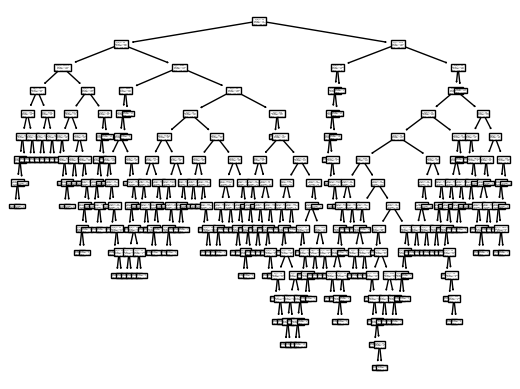

In [82]:
##Visualize Decision Tree:
from sklearn.tree import plot_tree
plot_tree(model)

We see that model is overfitting to training data. Lets use depth as hyperparameter to find the optimal depth.

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score,cross_validate

kfold = KFold(n_splits=10)

depths = [1,3,4,5,7,9,11,13]

for depth in depths:
    tree_clf = DecisionTreeClassifier(max_depth=depth,random_state=23)
    cv_acc_res = cross_validate(tree_clf,x_train_sm,y_train_sm,cv=kfold,scoring='accuracy',return_train_score=True)
    print(f"KFold for depth:{depth} Accuracy Mean:train:{cv_acc_res['train_score'].mean()*100} Validation:{cv_acc_res['test_score'].mean()*100}")
    print(f"KFold for depth:{depth} Accuracy std:train:{cv_acc_res['train_score'].std()*100} Validation:{cv_acc_res['test_score'].std()*100}")
    print("*"*15)

KFold for depth:1 Accuracy Mean:train:71.39962843577814 Validation:71.40234835666307
KFold for depth:1 Accuracy std:train:0.5315915546654594 Validation:4.784120764843867
***************
KFold for depth:3 Accuracy Mean:train:80.6062499007574 Validation:79.81515664256781
KFold for depth:3 Accuracy std:train:0.21925451993257236 Validation:2.4382937601136416
***************
KFold for depth:4 Accuracy Mean:train:83.06286104450831 Validation:80.72988770958315
KFold for depth:4 Accuracy std:train:0.935691705744266 Validation:6.453753570585592
***************
KFold for depth:5 Accuracy Mean:train:86.5618305095511 Validation:81.08342306311849
KFold for depth:5 Accuracy std:train:0.7760670133737354 Validation:6.23848098646205
***************
KFold for depth:7 Accuracy Mean:train:92.57949092525841 Validation:82.86135466338513
KFold for depth:7 Accuracy std:train:0.6803268033949493 Validation:5.705311437990541
***************
KFold for depth:9 Accuracy Mean:train:96.56298648713022 Validation:83.31

In [89]:
model = DecisionTreeClassifier(max_depth=4,random_state=23)
model.fit(x_train_sm,y_train_sm)
print(model.score(x_test,y_test))
print(model.score(x_train_sm,y_train_sm))

0.7006802721088435
0.8275862068965517


In [90]:
test_pred = model.predict(x_test)

In [91]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,test_pred)

array([[184,  63],
       [ 25,  22]], dtype=int64)

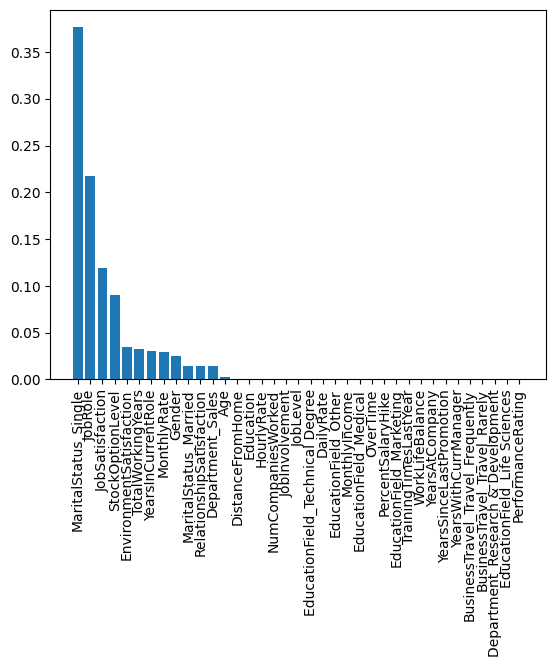

In [101]:
## Getting Feature Inporatnces:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [x_train.columns[i] for i in indices]
plt.bar(range(x_train.shape[1]),importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [100]:
names

['MaritalStatus_Single',
 'JobRole',
 'JobSatisfaction',
 'StockOptionLevel',
 'EnvironmentSatisfaction',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'MonthlyRate',
 'Gender',
 'MaritalStatus_Married',
 'RelationshipSatisfaction',
 'Department_Sales',
 'Age',
 'DistanceFromHome',
 'Education',
 'HourlyRate',
 'NumCompaniesWorked',
 'JobInvolvement',
 'JobLevel',
 'EducationField_Technical Degree',
 'DailyRate',
 'EducationField_Other',
 'MonthlyIncome',
 'EducationField_Medical',
 'OverTime',
 'PercentSalaryHike',
 'EducationField_Marketing',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'EducationField_Life Sciences',
 'PerformanceRating']